In [4]:
from google.colab import files
uploaded=files.upload()

Saving HistoricalData_FB.csv to HistoricalData_FB.csv
Saving Merge_headlines.csv to Merge_headlines.csv


# ***Importing the required libraries***

In [5]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings('ignore')

Reading the data

In [ ]:
import io

fb_data=pd.read_csv(io.BytesIO(uploaded['Merge_headlines.csv']))
fb_data = pd.read_csv("Merge_headlines.csv", parse_dates=['Date'])

fb_data



Cleaning the data

In [ ]:
fb_data.isnull().sum()

In [8]:
fb_data.sort_index(inplace=True)

In [ ]:
fb_data

In [10]:
stock=pd.read_csv(io.BytesIO(uploaded['HistoricalData_FB.csv']))

In [11]:
import datetime
stock['Date'] = pd.to_datetime(stock['Date'], format="%m/%d/%Y")

In [ ]:
stock['Date']

In [ ]:
stock

In [14]:
stock.rename(columns={"Close/Last":"Close"},inplace = True)


In [15]:
stock.sort_values('Date', inplace=True)


In [ ]:
stock.reset_index()

In [ ]:
stock.isnull().sum()

In [ ]:
stock.columns

In [19]:
data = pd.merge(fb_data, stock, how='inner', on=['Date'])

In [ ]:
data

Replacing the names

In [21]:
data["Close"] = data["Close"].str.replace('$', '').astype(float)
data["Open"] = data["Open"].str.replace('$', '').astype(float)
data["High"] = data["High"].str.replace('$', '').astype(float)
data["Low"] = data["Low"].str.replace('$', '').astype(float)

In [ ]:
data.head()

In [23]:
data.reset_index(inplace=True)
data_1=data[["Date","Close"]]

In [24]:
data_1=data[["Date","Close"]]

In [25]:
data_1=data_1.rename(columns={"Date": "ds", "Close": "y"})

In [ ]:
data_1.head()

# Visualization

**Prophet model:**Prophet is a forecasting procedure implemented in R and Python. ... Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects.

In [ ]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data_1)

In [ ]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Facebook Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

In [ ]:
m.plot_components(prediction)
plt.show()

In [ ]:
data.set_index("Date", inplace = True)
data.head()

In [ ]:
data.sort_index(ascending=True,inplace=True)
data.head()

Plotting the Distribution

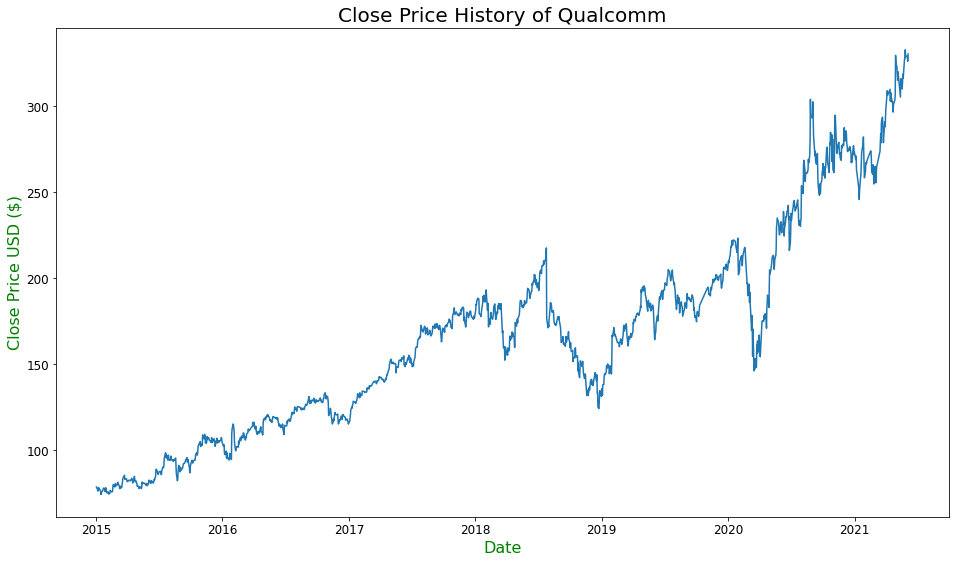

In [32]:
plt.figure(figsize=(16,9))
plt.title('Close Price History of Qualcomm', fontsize = 20)
plt.plot(data['Close'])
plt.xlabel('Date', fontsize = 16, color = 'g')
plt.ylabel('Close Price USD ($)', fontsize = 16, color = 'g')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [33]:
import os
data.to_csv('NewsandHistoricaldata.csv')

In [ ]:
data['compound'] = ''
data['negative'] = ''
data['neutral'] = ''
data['positive'] = ''
data.head()

# Applying the Sentimental Analysis for the data

In [ ]:
import nltk
nltk.download('vader_lexicon')

In [36]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

In [37]:
sid = SentimentIntensityAnalyzer()

data['compound'] = data['Headlines'].apply(lambda x: sid.polarity_scores(x)['compound'])
data['negative'] = data['Headlines'].apply(lambda x: sid.polarity_scores(x)['neg'])
data['neutral'] = data['Headlines'].apply(lambda x: sid.polarity_scores(x)['neu'])
data['positive'] = data['Headlines'].apply(lambda x: sid.polarity_scores(x)['pos'])


In [38]:
from textblob import TextBlob

In [ ]:
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getpolarity(text):
    return TextBlob(text).sentiment.polarity

data['Subjectivity']=data['Headlines'].apply(getsubjectivity)
data['Polarity']=data['Headlines'].apply(getpolarity)
data

In [ ]:
data.head()

In [ ]:
data.columns

In [ ]:
data = data[['Close', 'compound', 'negative', 'neutral', 'positive', 'Open', 'High', 'Low', 'Volume','Subjectivity','Polarity']]

data.head()

In [43]:
stockdata=data.to_csv('stockdata.csv')

In [ ]:
stockdata = pd.read_csv('stockdata.csv', index_col = False)

stockdata.rename(columns={'Unnamed: 0':'Date'}, inplace = True)

stockdata.set_index('Date', inplace=True)

stockdata.head()

In [ ]:
stockdata.isna().any()

In [ ]:
stockdata.describe(include='all')

In [ ]:
stockdata.info()

# Preparing the data

In [48]:
X=stockdata[['Open','High','Low','Volume','positive','neutral','positive','compound','Subjectivity','Polarity']]
Y=stockdata['Close']

In [ ]:
print(X)

In [ ]:
Y

# Training the Algorithm

**Linear Regression Model:**Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). 

Making the Linear Regression Algorithm

In [51]:
from sklearn import metrics
import seaborn as sns

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X, Y, test_size =
0.25, random_state = 0)

In [ ]:
print(X_test)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

# Making the Linear Regression Algorithm

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)


In [57]:
Y_pred=regressor.predict(X_test)

In [ ]:
Y_pred.shape

In [ ]:
Y_test.shape

# Evaluating the data

The final step is to evaluate the performance of the model. This step is important to compare how well both the algorithms perform on a specified dataset.

In [ ]:
regressor.score(X_test,Y_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test,Y_pred))

In [ ]:
print('Mean squared Error:', metrics.mean_squared_error(Y_test,Y_pred))

In [ ]:
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

In [64]:
dframe=pd.DataFrame({'Actual price':Y_test,'Predicted price':Y_pred})

In [ ]:
# Comparing Actual vs Predicted
print(dframe)

# Plotting the Result

In [66]:
#plotting the grid to depict the actual and predicted value
graph=dframe.head(20)

In [ ]:
graph.plot(kind='bar')

In [ ]:
#from google.colab import drive
#import os
#drive.mount('/content/drive',force_remount=True)
#PATH='/content/drive/My Drive/Model'

In [ ]:
#filename='fb_LRModel'
#path_to_embed=os.path.join(PATH,filename)
#print(path_to_embed)

/content/drive/My Drive/Model/fb_LRModel


In [68]:
import pickle
pickle_out=open("fb_LRModel.pkl","wb")
pickle.dump(regressor,pickle_out)
pickle_out.close()

In [69]:
files.download('fb_LRModel.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#pickle.dump(regressor,open(filename,'wb'))

In [ ]:
#loaded_model=pickle.load(open(filename,'rb'))
#loaded_model.predict(X_test)